# Week 07, Part 2

### Topic
 1. Confidence intervals
 1. BACK TO SLIDES FOR ARBITRARY CONFIDENCE INTERVAL 
 1. Arbitrary Confidence interval 
 1. Examples
   1. Another example: using fishdata
   1. Example with Ozone dataset
 1. BACK TO SLIDES FOR HYPOTHESIS TESTING


In [3]:
# resize
require(repr)
options(repr.plot.width=4, repr.plot.height=4, repr.plot.res=300)

We'll make use of the plot polygon function:

In [4]:
source('../week04/plot_polygons.R')

## 1. Confidence Intervals

Let's first start with a generic example of 200 observations which we will assume comes from a normal distribution (independent, $n_{samples} > 30$, no underlaying skew of population).

Let's say we have a list of observations: 
 * observations: x1, x2, ..., xn

Here, let's assume 200 observations to start with.

From this set of observations, let's say we calculate some mean:
 * mean(x1, x2, ..., xn) = 5.0

This is just an example!

And let's assume we find from our xn observations we measure the standard devation of:
 * sd(x1, x2, ..., xn) = 2.0

Put down our measurements:

In [7]:
sample_mean = 5.0
sample_SD = 2.0
nsample = 200 # number of samples

First, let's plot the distribution of our theoretical sample means, first we need to define our Standard Error:

In [8]:
SE = sample_SD/nsample**0.5

Plot distribution of *sample means*:

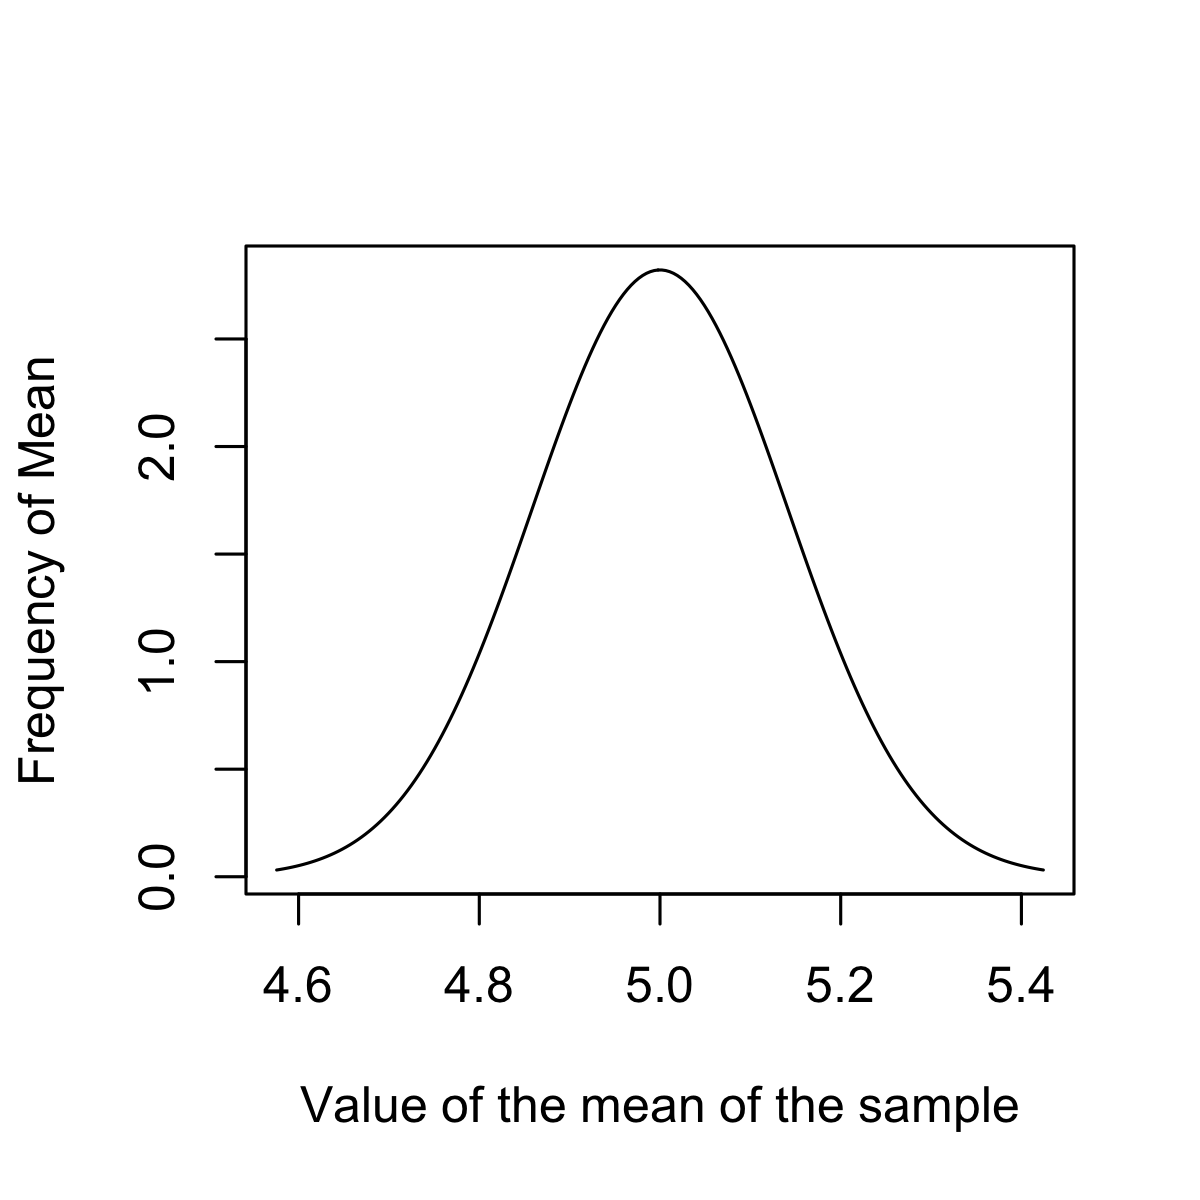

In [9]:
x = seq(sample_mean-3*SE, sample_mean+3*SE, length=200)
y = dnorm(x, mean=sample_mean, sd=SE)
plot(x,y,type='l', xlab='Value of the mean of the sample', ylab='Frequency of Mean')

We can now create a confidence interval for this sample_mean.  Let's start with the typical 95% confidence interval:

In [10]:
confidence_percent = 0.95

Let's calculate the Z-score corresponding to the 95% percentile.  This 95% is centered around the center of the normal distribution. To figure out what Z-score this corresponds to, we need to translate this to a percentile *around* the mean - which we do by finding the remaining part of the distribution "left" in the tails:

In [11]:
percent_tails = (1.0 - confidence_percent)/2.0 # 0.025
print(percent_tails)

[1] 0.025


i.e. the percent of the distribution in the tails will be 2.5% on each side $\rightarrow$ $\frac{(100\%-95\%)}{2}$

Now, let's find the Z-score corresponding to this percentile:

In [12]:
Z_95_star = qnorm(1-percent_tails) # = 1.96
print(Z_95_star)

[1] 1.959964


i.e. this is how far our "confidence interval" extends from the mean on a *normalized* normal model.

To figure out how that relates to our actual model, we multiply this by the SE of our model:

In [13]:
interval = Z_95_star*SE

estimate mean: sample_mean $\pm$ Z\_95*SE

In [14]:
print(paste("Estimate of sample mean is", sample_mean, '+/-', interval))

[1] "Estimate of sample mean is 5 +/- 0.277180764869935"


How does this look on the plot - we can use our polygon again:

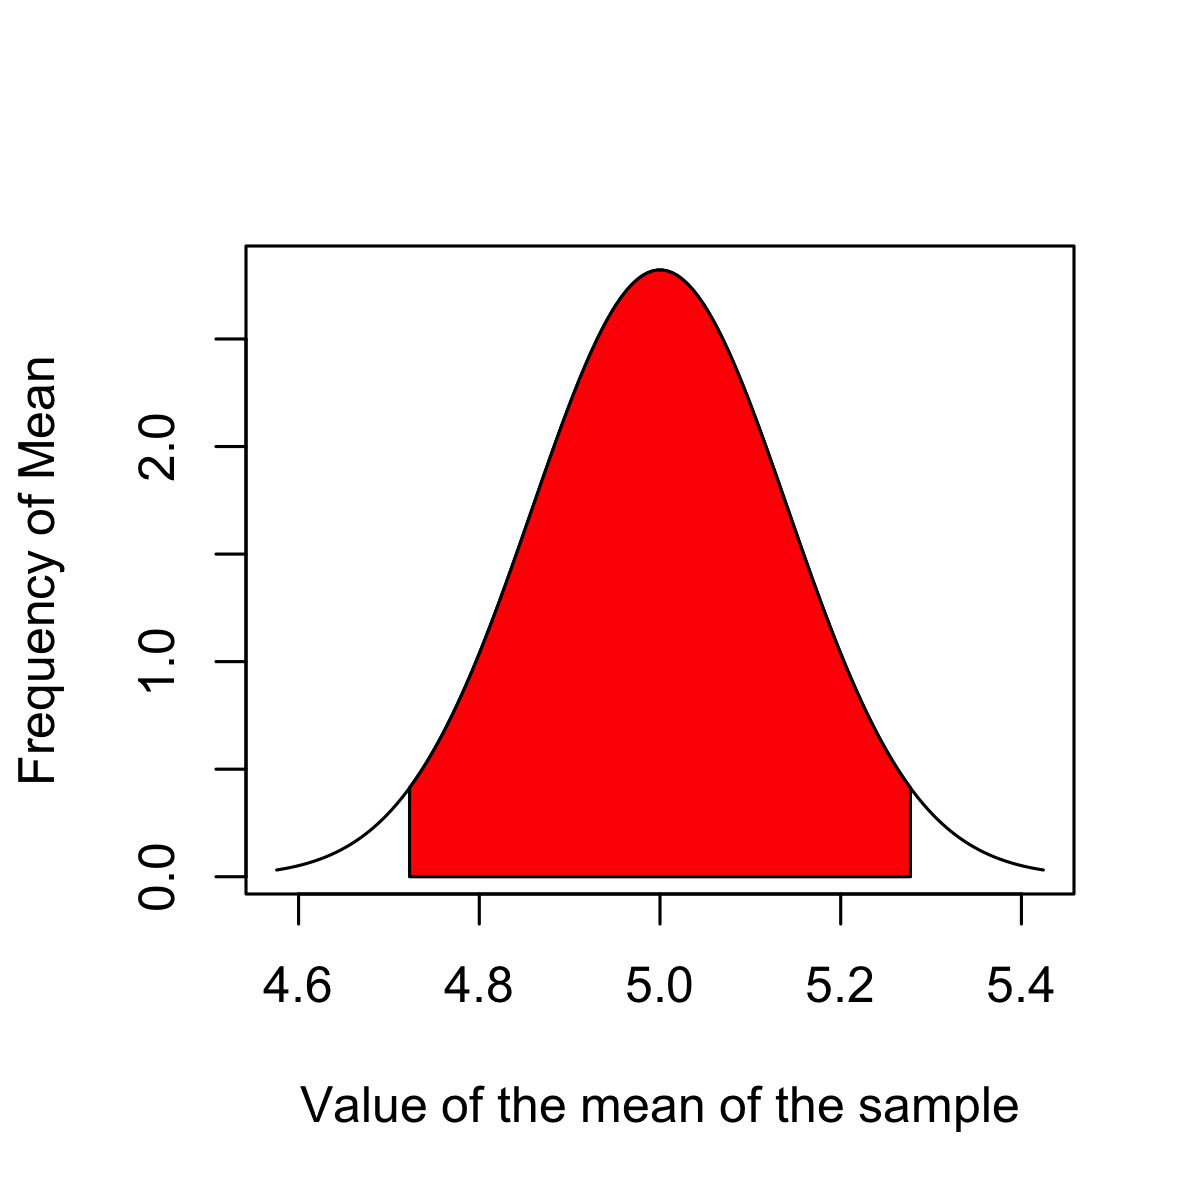

In [15]:
plot(x,y,type='l', xlab='Value of the mean of the sample', ylab='Frequency of Mean')

x2 = seq(sample_mean-interval, sample_mean+interval, length=100)
y2 = dnorm(x2, mean=sample_mean, sd = SE)
draw_polygon(x2,y2)

To see that this is indeed our typical 95% rule we can do the same thing but comparing it to a normalized model:

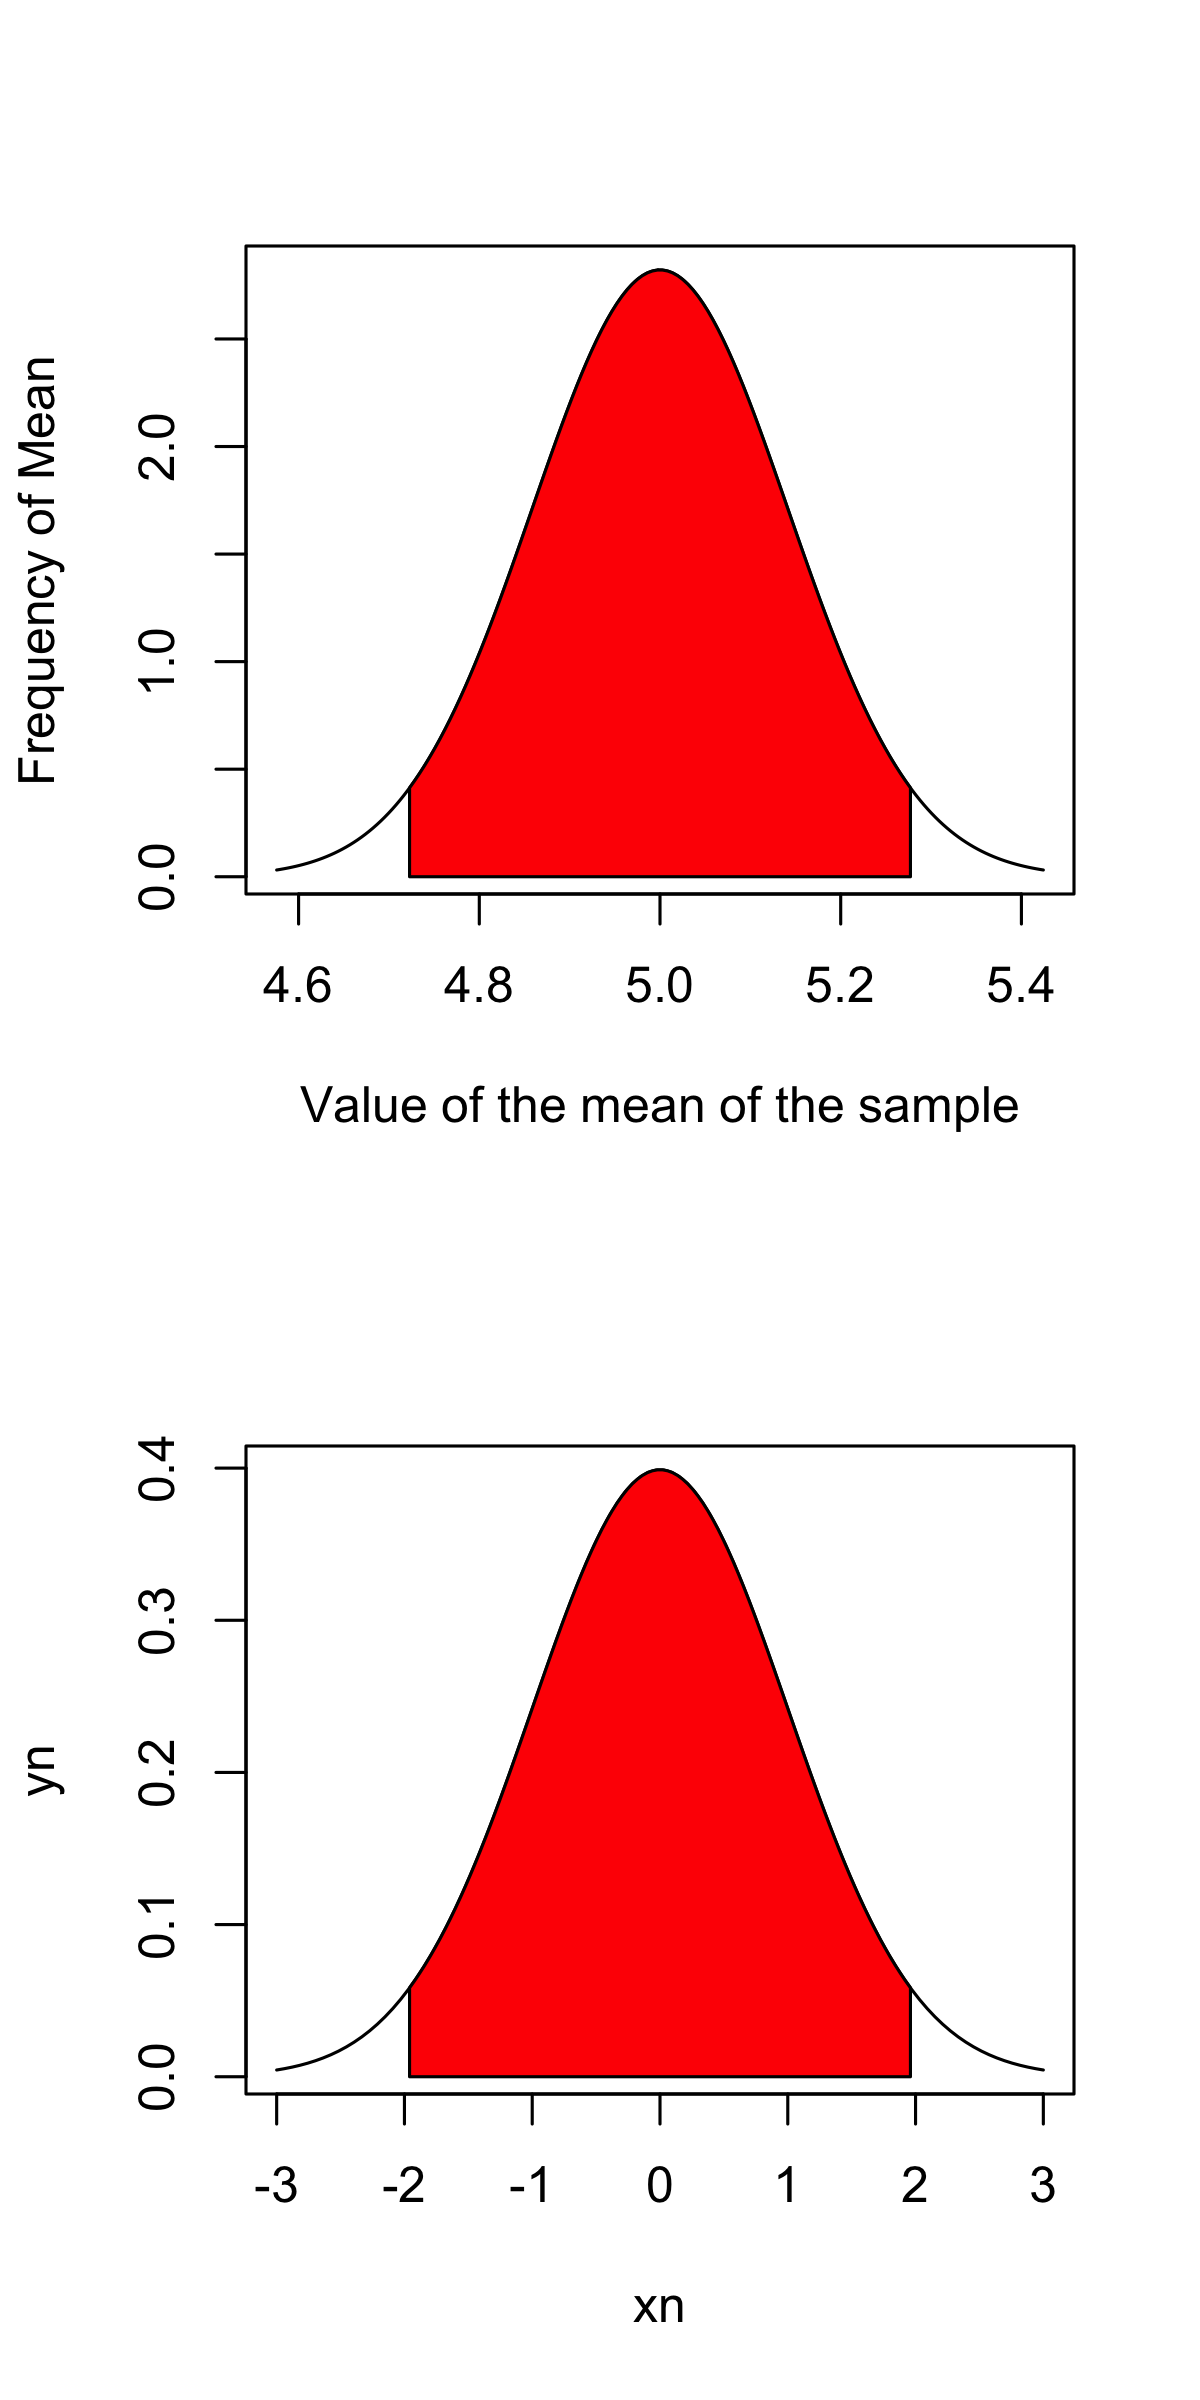

In [18]:
options(repr.plot.width=4, repr.plot.height=8) # just for the notebook
par(mfrow=c(2,1)) # 2 rows, 1 column

plot(x,y,type='l', xlab='Value of the mean of the sample', ylab='Frequency of Mean')
x2 = seq(sample_mean-interval, sample_mean+interval, length=100)
y2 = dnorm(x2, mean=sample_mean, sd = SE)
draw_polygon(x2, y2)

# our "normal" normal model
xn = seq(-3,3,length=100)
yn = dnorm(xn,mean=0,sd=1)
plot(xn,yn, type='l')
xn2 = seq(-Z_95_star,Z_95_star,length=100)
yn2 = dnorm(xn2, mean=0,sd=1)
draw_polygon(xn2, yn2)

## 2. BACK TO SLIDES FOR ARBITRARY CONFIDENCE INTERVAL 

## 3. Arbitrary Confidence interval 

Just grabbing what we had above:

In [19]:
confidence_percent = 0.99 # try other values

In [20]:
# Calculate what is in the tails, percentage wise:
percent_tails = (1.0 - confidence_percent)/2.0 # 0.025

# Arbitrary Z-star (Z-score) for the percent in the tails
Z_star = qnorm(1-percent_tails) # = 1.96 for 95%
print(Z_star)

[1] 2.575829


Grab our confidence interval:

In [21]:
interval = Z_star*SE

Plot!

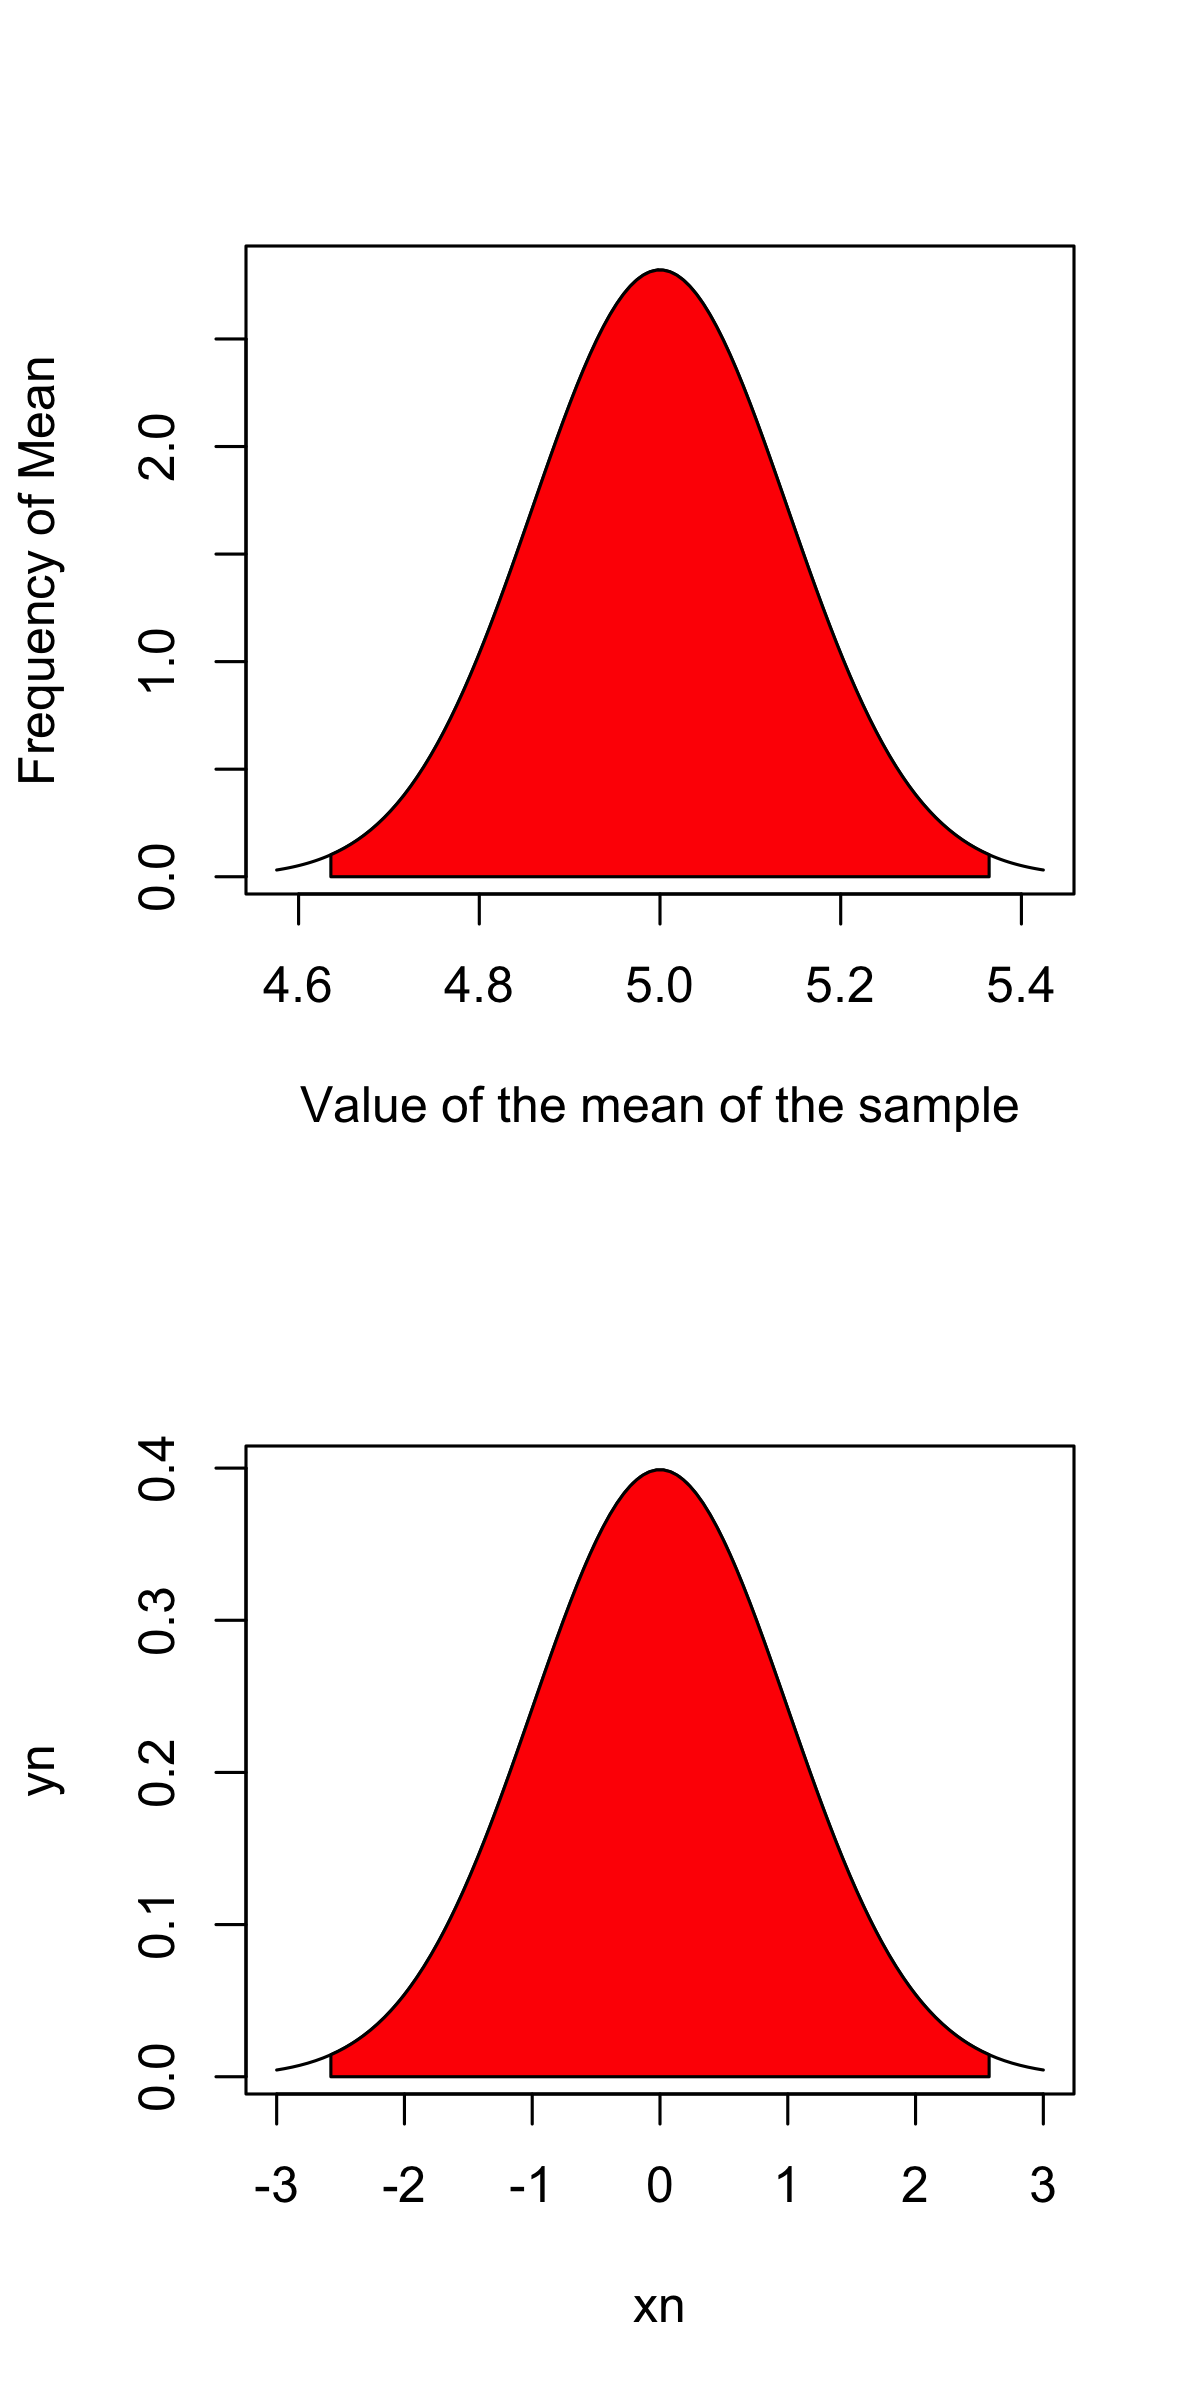

In [22]:
options(repr.plot.width=4, repr.plot.height=8)
par(mfrow=c(2,1))

plot(x,y,type='l', xlab='Value of the mean of the sample', ylab='Frequency of Mean')
x2 = seq(sample_mean-interval, sample_mean+interval, length=100)
y2 = dnorm(x2, mean=sample_mean, sd = SE)
draw_polygon(x2, y2)

# Compare to normalized normal model:
xn = seq(-3,3,length=100)
yn = dnorm(xn,mean=0,sd=1)
plot(xn,yn, type='l')
xn2 = seq(-Z_star,Z_star,length=100)
yn2 = dnorm(xn2, mean=0,sd=1)
draw_polygon(xn2, yn2)

## 4. Examples

### 4.A Another example: using fishdata


Recall what we had before (can go back to fish-data example)

In [23]:
fishdata = read.csv("../week02/undata_fish_2020.csv")
log_trade_usd = log10(fishdata$Trade..USD.)

Let's say we have a sample of this data:

In [24]:
nsamples = 20
mysample = log_trade_usd[sample(1:length(log_trade_usd),nsamples,replace=FALSE)]

We can calcualate the mean of this sample:

In [25]:
mean_fish = mean(mysample)

And the standard error:

In [26]:
SE_fish = sd(mysample)/nsamples^0.5

What is the 72% confidence interval for our sample mean?

We can do our setup much in the same way as before:

In [27]:
confidence_percent = 0.72 # try other values

Calculate what is in the tails, percentage wise:

In [29]:
percent_tails = (1.0 - confidence_percent)/2.0 

Arbitrary Z-star (Z-score) for the percent in the tails:

In [30]:
Z_star = qnorm(1-percent_tails) # = 1.96 for 95%
print(Z_star)

[1] 1.080319


The only difference now is what Standard Error we are using:

In [31]:
interval = Z_star*SE_fish

Finally print:

In [32]:
print(paste("Estimate of sample mean is", mean_fish, '+/-', interval))

[1] "Estimate of sample mean is 5.45663439313257 +/- 0.324346621220432"


In this way - we can get an arbitrary confidence interval about this mean.

### 4.B Example with Ozone dataset


Don't forget to store this file somewhere you know where it is!

In [33]:
ozone = read.csv('ozone2.csv')

Check out this dataset a bit:

In [34]:
head(ozone)

,Month,Day_of_month,Day_of_week,ozone_reading,pressure_height,Wind_speed,Humidity,Temperature_Sandburg,Temperature_ElMonte,Inversion_base_height,Pressure_gradient,Inversion_temperature,Visibility
,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,1,4,3.01,5480,8,20.00000,37.78175,35.31509,5000.000,-15,30.56000,200
2,1,2,5,3.20,5660,6,48.41432,38.00000,45.79294,4060.589,-14,46.86914,300
3,1,3,6,2.70,5710,4,28.00000,40.00000,48.48006,2693.000,-25,47.66000,250
4,1,4,7,5.18,5700,3,37.00000,45.00000,49.19898,590.000,-24,55.04000,100
5,1,5,1,5.34,5760,3,51.00000,54.00000,45.32000,1450.000,25,57.02000,60
6,1,6,2,5.77,5720,4,69.00000,35.00000,49.64000,1568.000,15,53.78000,60


So there are a lot of random looking things there - we'll actually use this dataset again for linear regression (I think), but right now we're just going to look at some temperature readings.

Make a temperature vector:

In [35]:
temp_sandburg = ozone[,names(ozone)=="Temperature_Sandburg"]

Let's check out the distribution of this temperature:

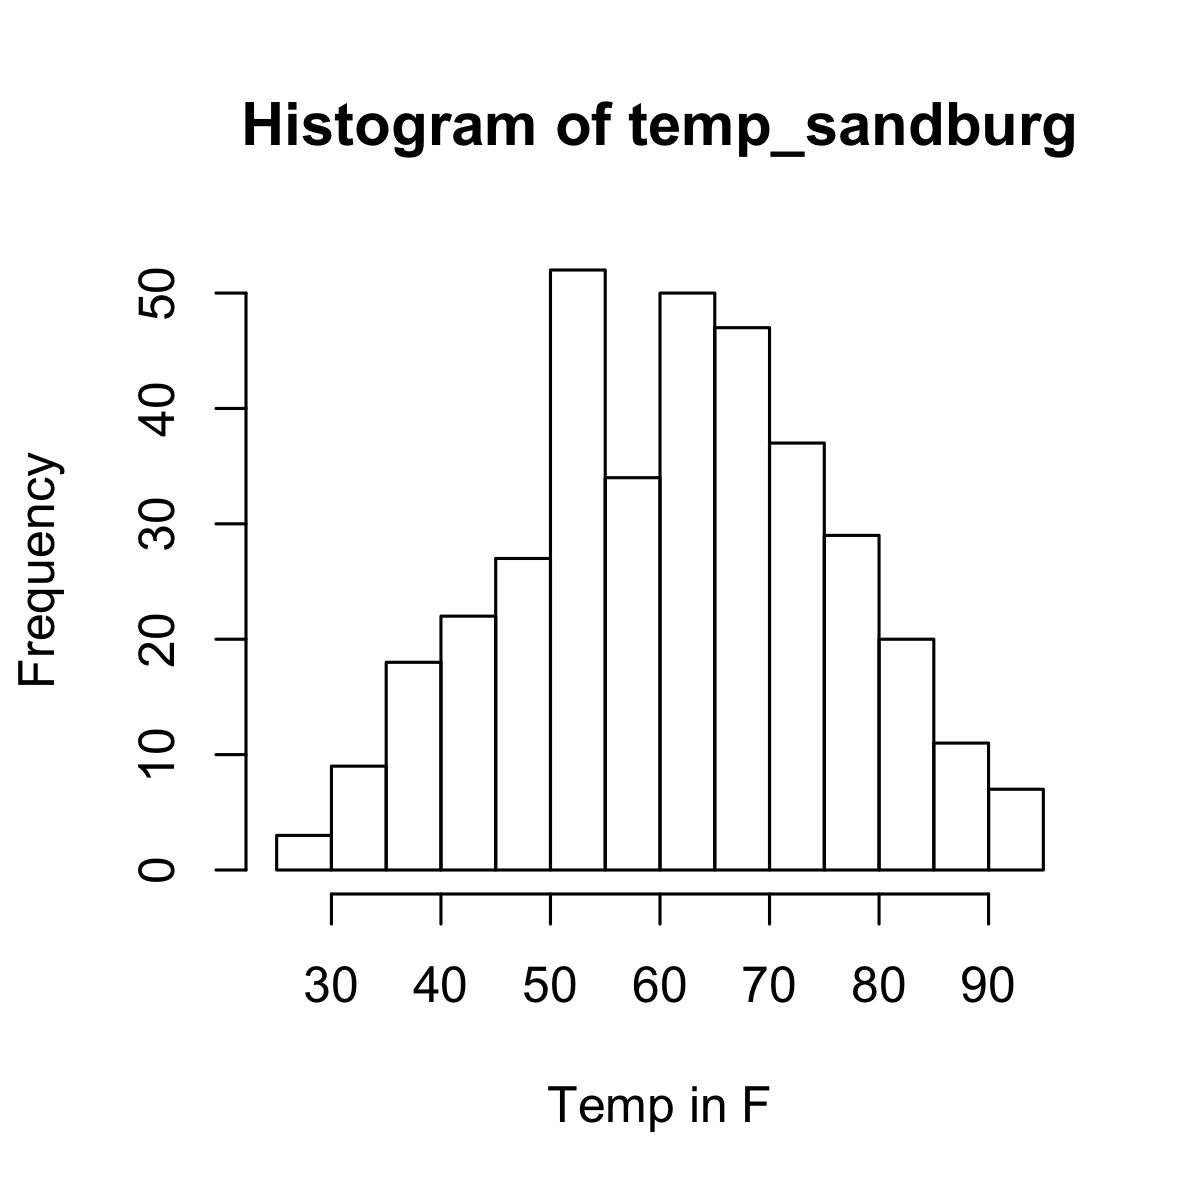

In [36]:
options(repr.plot.width=4, repr.plot.height=4)

hist(temp_sandburg, xlab='Temp in F', ylab = 'Frequency')

It looks like the mean temperature at Sandburg (airbase) is ~ 60?  Let's calculate:

In [37]:
mean_sandburg = mean(temp_sandburg)
print(mean_sandburg)

[1] 61.85215


How confident are we about this mean?


In [38]:
confidence_percent = 0.99
percentile_tails = (1.0-confidence_percent)/2.0 
Z_star = qnorm(percentile_tails, lower.tail=FALSE) # again, either way is fine
Z_star = qnorm(1-percentile_tails)

Creating a point estimate: sample_mean $\pm$ z* X SE:

In [39]:
SE_sandburg = sd(temp_sandburg)/length(temp_sandburg)**0.5

In [40]:
interval = Z_star*SE_sandburg

In [41]:
print(paste("Estimate of sample mean is ", mean_sandburg, "+/-", interval))

[1] "Estimate of sample mean is  61.8521477080962 +/- 1.92445833705318"


This seems overly small given the width of the Sandburg temperature distribution - any guesses to why that is? *THINK ON IT A BIT!*

This is because we are trying to compare 2 different things.

The width of the histogram of the Sandburg temperatures gives a us a measure of how the temperature changes at Sandburg over the time period of this dataset (a year).

The confidence interval we calculated gives us how much we expect the *mean of this distribution to change* if we go out and re-collect a sample.

We can sort of *fake* this by simulating doing a sample of this dataset and calculating its mean a few times - giving us the distribution of sample means:

In [50]:
mymeans = c() # where the sample means are stored

nsamples = 10 # *Try changing this parameter and see how the plot and SE change*

nmeans = 300 #start with 5
for (i in 0:nmeans){
  mysample = temp_sandburg[sample(1:length(temp_sandburg), nsamples, replace=FALSE)]
  mymeans = append(mymeans, mean(mysample))
}

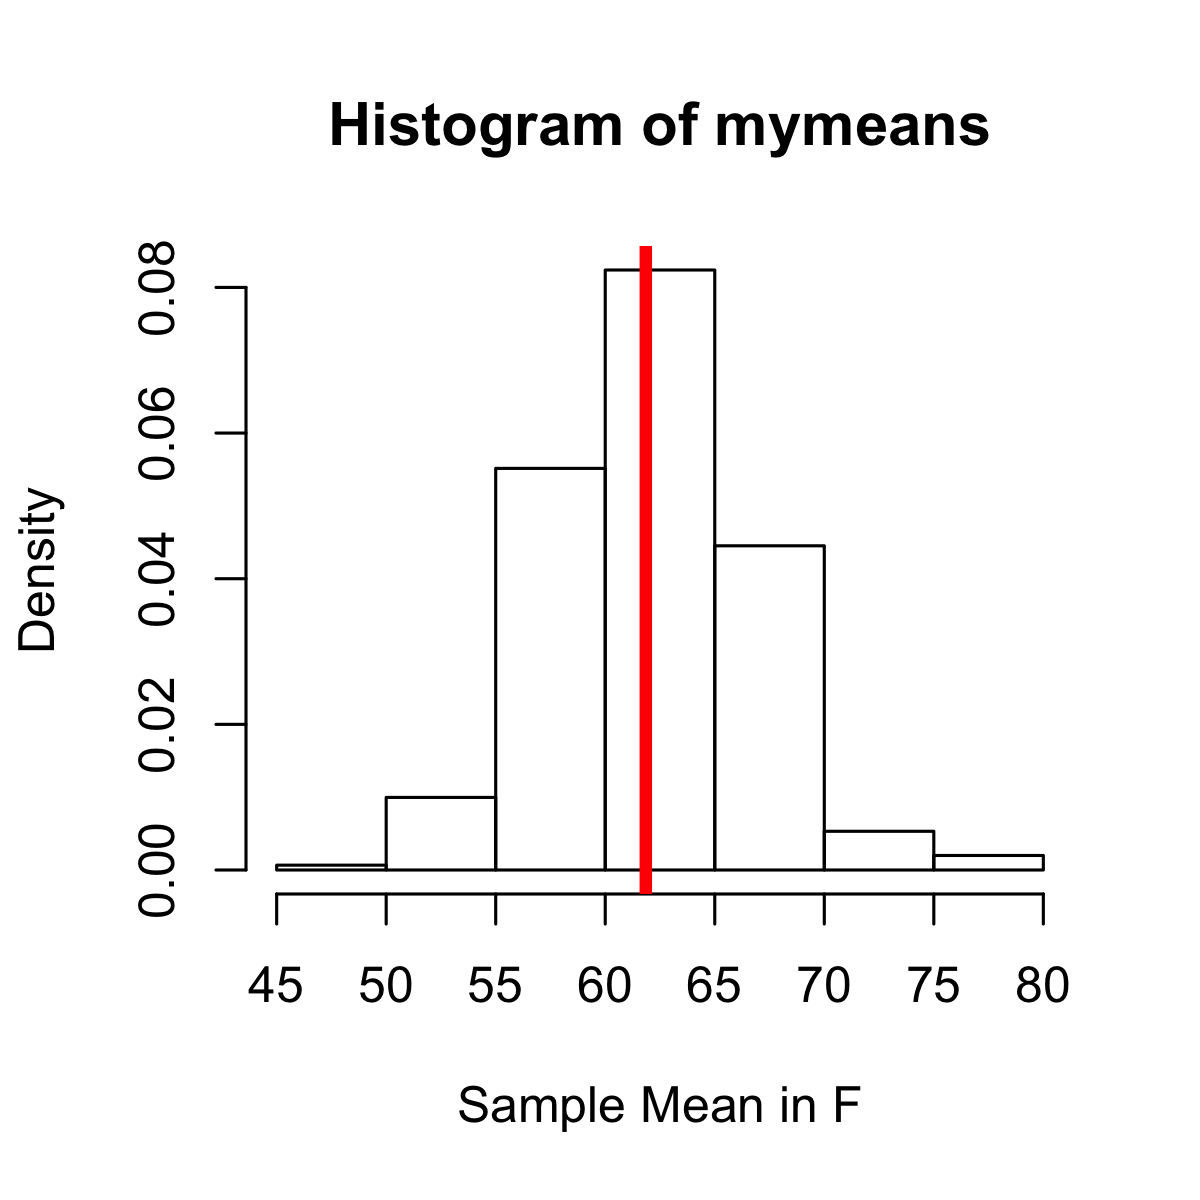

In [51]:
hist(mymeans, xlab="Sample Mean in F", prob=TRUE)
# lets plot the actual population mean
abline(v=mean(temp_sandburg), col="red", lwd=4)

So something like a few 10s (depends on number of sample means calculated).

First, calculate its standard error:

In [47]:
SE = sd(mysample)/nsamples^0.5
print(SE)

[1] 5.191446


This SE matches up better with our sample mean distribution that we have plotted.

We can see if we change the number of samples (change nsample) the width of our distribution of means changes and so does SE.  This is what SE is measuring!

If we have a naturally wider population and therefore sample distribution (the sample SD is bigger) than our measure of SE is indeed bigger (SE is proportional to SD of the sample), *but* we can get better and better estimates of the true population mean if we have larger sample sizes since SE is also proportional to 1/nsamples$^2$.